In [1]:
%matplotlib inline
from fastai import *

In [2]:
n = 100

In [3]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.9215,  1.0000],
        [-0.6126,  1.0000],
        [-0.3175,  1.0000],
        [-0.7668,  1.0000],
        [ 0.0235,  1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

In [5]:
y = x@a + torch.rand(n)

In [6]:
y

tensor([ 5.4084,  0.3193,  1.4395,  0.3271,  2.9428, -0.3408,  4.4074,  5.7486,
         4.8403,  1.0442,  3.4823,  0.1195,  1.4903,  0.3528,  4.4390,  2.7802,
         4.3308,  2.7256,  3.5220,  3.0926,  0.0077,  3.2191,  3.7863,  2.4471,
         2.2826, -0.0428, -0.2788,  3.4127,  1.8267,  1.8911, -0.3135,  3.9319,
         2.6688,  0.2208, -0.6477,  3.5278,  4.9215,  1.0169,  3.6922,  2.6028,
         1.8574,  4.9777,  2.5063,  3.8081,  3.9464,  3.8915,  4.3528,  4.6057,
         4.7001,  5.4799,  2.0309,  3.8294,  2.2710,  3.2199,  5.3514,  1.4729,
         1.7482,  1.6686,  3.9257,  3.2695,  0.7606,  5.5163,  2.8749,  2.3128,
         4.7646,  4.8393,  1.4372,  4.8929,  0.1193,  2.2146,  2.7666,  0.4189,
         3.8664,  0.4270,  5.0154,  0.7520,  4.9171,  0.7301,  1.5987,  1.5286,
         1.9698,  2.9755,  3.2319,  2.5185,  0.2131,  4.7883,  1.6522,  2.8061,
         3.2173, -0.1214,  1.7328,  5.6054,  5.6296,  4.1694,  4.8873,  1.5659,
         4.2080,  3.1713,  2.1399, -0.01

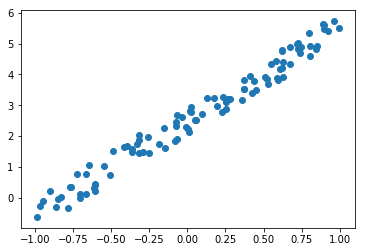

In [7]:
plt.scatter(x[:,0], y)

In [8]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [9]:
a = tensor(-1.,1)

In [10]:
a

tensor([-1.,  1.])

In [11]:
y_hat = x@a

In [12]:
y_hat

tensor([0.0785, 1.6126, 1.3175, 1.7668, 0.9765, 1.7844, 0.3696, 0.0343, 0.2719,
        1.6500, 0.5512, 1.6638, 1.3636, 1.7746, 0.4209, 0.9751, 0.3262, 0.9045,
        0.6267, 0.7457, 1.8298, 0.7233, 0.5598, 1.0755, 1.0074, 1.8501, 1.9687,
        0.5743, 1.0823, 1.0679, 1.8609, 0.4891, 1.0685, 1.9036, 1.9876, 0.6312,
        0.1460, 1.5513, 0.4700, 1.0329, 1.3171, 0.2808, 0.9487, 0.6302, 0.5908,
        0.4140, 0.4529, 0.1930, 0.2590, 0.1034, 1.3174, 0.4058, 1.1563, 0.8251,
        0.2043, 1.2929, 1.3319, 1.3988, 0.3740, 0.7649, 1.7245, 0.0054, 0.7437,
        1.0724, 0.3777, 0.1528, 1.2558, 0.2560, 1.7032, 0.9942, 0.7705, 1.6073,
        0.4788, 1.6047, 0.2758, 1.6698, 0.1921, 1.5076, 1.1450, 1.4874, 1.2591,
        0.8047, 0.8703, 0.9444, 1.6075, 0.3778, 1.4197, 0.9820, 0.7322, 1.9485,
        1.1868, 0.1030, 0.1065, 0.3885, 0.3291, 1.3648, 0.3755, 0.6443, 0.9894,
        1.7050])

In [13]:
mse(y_hat, y)

tensor(8.3634)

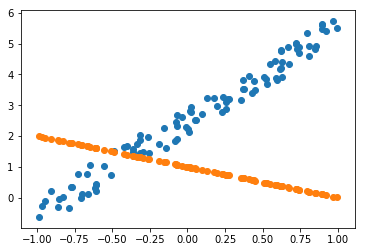

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], y_hat)

In [15]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [16]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [17]:
lr = 1e-1
for t in range(100): update()

tensor(8.3634, grad_fn=<MeanBackward1>)
tensor(1.3980, grad_fn=<MeanBackward1>)
tensor(0.4268, grad_fn=<MeanBackward1>)
tensor(0.1759, grad_fn=<MeanBackward1>)
tensor(0.1086, grad_fn=<MeanBackward1>)
tensor(0.0905, grad_fn=<MeanBackward1>)
tensor(0.0856, grad_fn=<MeanBackward1>)
tensor(0.0843, grad_fn=<MeanBackward1>)
tensor(0.0840, grad_fn=<MeanBackward1>)
tensor(0.0839, grad_fn=<MeanBackward1>)


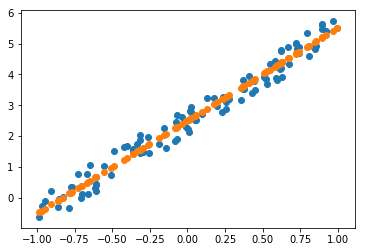

In [18]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], x@a)

In [19]:
from matplotlib import animation, rc
rc('animation', html='html5')

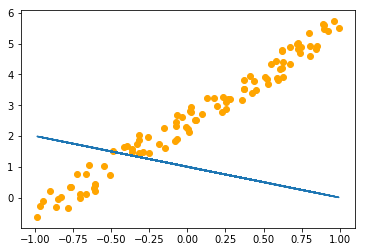

In [20]:
a = nn.Parameter(tensor(-1., 1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)

In [21]:
plt.close()

In [22]:
def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

In [23]:
animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)